In [1]:
import sys
import os
import argparse
import csv
import numpy as np

# from torch.utils.data import Dataset, DataLoader

import torch

import torch.nn.functional as F

import pandas as pd
from torch.utils.data import Sampler
from collections import defaultdict
import random
from tqdm import tqdm

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
NAMES = ['DC1','DC5', 'UC1_I', 'UC1_NI', 'UC6_I', 'UC6_NI', 'UC7_I', 'UC9_I']
cluster_path='E:/DATA/crunch/tmp/cluster'
group= 'train'


E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


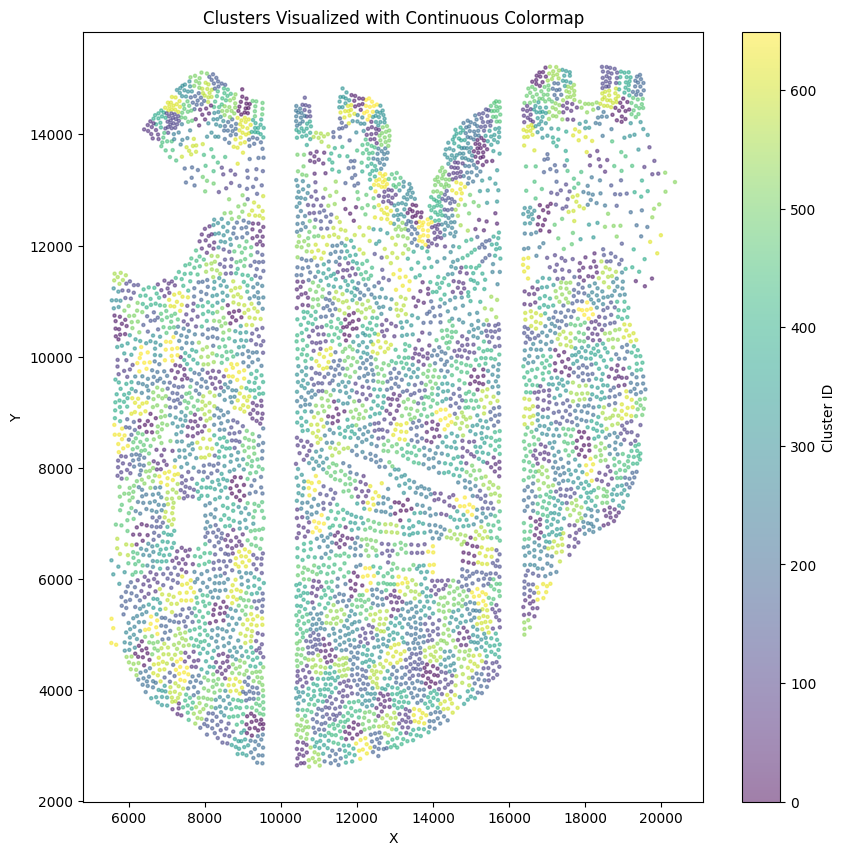

Cluster 0: Radius = 290.9902456950305
Cluster 1: Radius = 247.42956997103147
Cluster 2: Radius = 224.84175846650666
Cluster 3: Radius = 295.8311808657437
Cluster 4: Radius = 243.63835741066484
Cluster 5: Radius = 251.44289912875635
Cluster 6: Radius = 284.24005369916796
Cluster 7: Radius = 223.8267642257306
Cluster 8: Radius = 188.35290694754528
Cluster 9: Radius = 238.4341793448211
Cluster 10: Radius = 233.4411364256309
Cluster 11: Radius = 221.56164285165522
Cluster 12: Radius = 228.2544953869509
Cluster 13: Radius = 232.71831979605875
Cluster 14: Radius = 265.08033310970643
Cluster 15: Radius = 250.01720271488537
Cluster 16: Radius = 223.12252262892744
Cluster 17: Radius = 251.5991328368346
Cluster 18: Radius = 339.8908955404773
Cluster 19: Radius = 300.02252343463914
Cluster 20: Radius = 301.772657662848
Cluster 21: Radius = 250.46140946718128
Cluster 22: Radius = 235.92213295046795
Cluster 23: Radius = 235.32489795449996
Cluster 24: Radius = 244.2714013765937
Cluster 25: Radius = 

E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


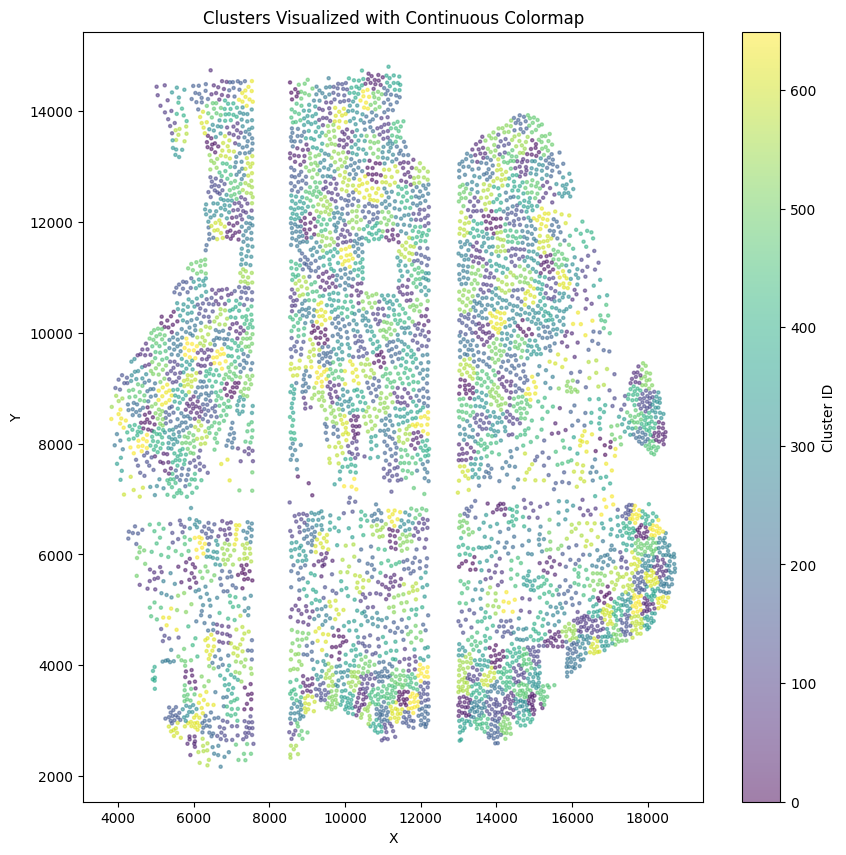

Cluster 0: Radius = 245.93403910114625
Cluster 1: Radius = 234.3984672293143
Cluster 2: Radius = 167.60215500981735
Cluster 3: Radius = 215.76949688256906
Cluster 4: Radius = 256.047090104138
Cluster 5: Radius = 202.39147851415655
Cluster 6: Radius = 209.21716516117354
Cluster 7: Radius = 253.39603286378448
Cluster 8: Radius = 187.99890970093432
Cluster 9: Radius = 249.60150325510222
Cluster 10: Radius = 219.69169146737715
Cluster 11: Radius = 241.8923210516816
Cluster 12: Radius = 165.7208318058294
Cluster 13: Radius = 251.31160526871503
Cluster 14: Radius = 286.3042970812791
Cluster 15: Radius = 220.9133736992728
Cluster 16: Radius = 246.7522190260957
Cluster 17: Radius = 224.07206813599294
Cluster 18: Radius = 183.79649710437533
Cluster 19: Radius = 270.091211159636
Cluster 20: Radius = 224.03553078083502
Cluster 21: Radius = 186.45797697833007
Cluster 22: Radius = 225.4336543662921
Cluster 23: Radius = 213.23925684139164
Cluster 24: Radius = 207.81234158983597
Cluster 25: Radius = 

E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


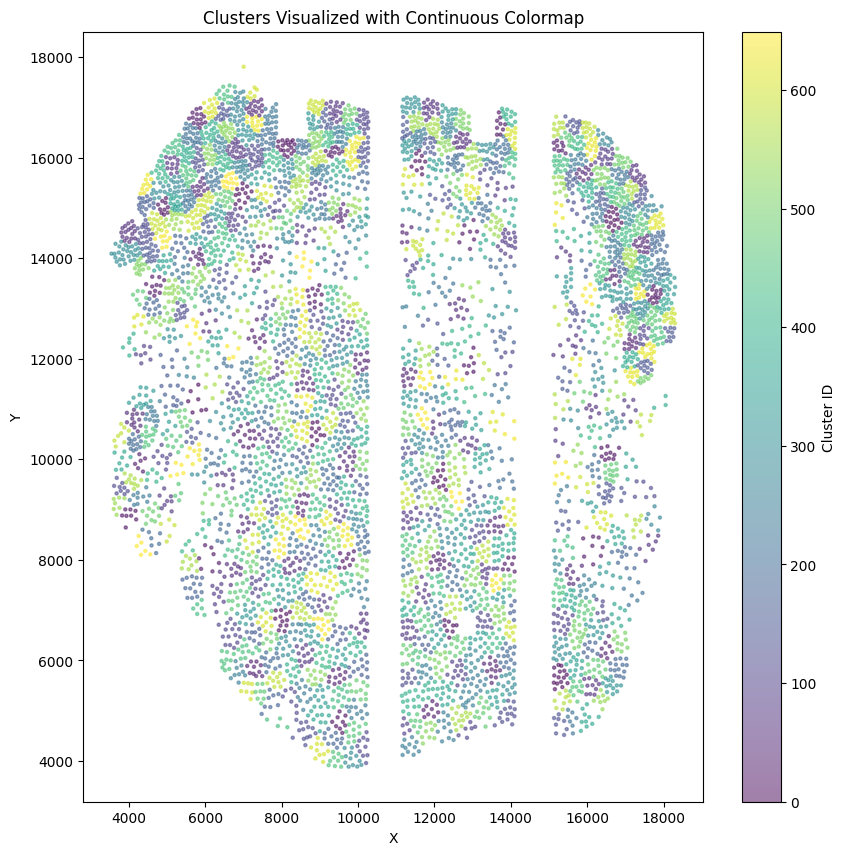

Cluster 0: Radius = 301.7503944821477
Cluster 1: Radius = 266.50972183094325
Cluster 2: Radius = 242.49324368264178
Cluster 3: Radius = 252.39252247512076
Cluster 4: Radius = 277.25699362586613
Cluster 5: Radius = 333.5153506768744
Cluster 6: Radius = 252.79902054165825
Cluster 7: Radius = 269.1305110695312
Cluster 8: Radius = 292.6504336446812
Cluster 9: Radius = 206.500071509249
Cluster 10: Radius = 246.29510890931388
Cluster 11: Radius = 191.37023345582443
Cluster 12: Radius = 217.95613372975987
Cluster 13: Radius = 323.8372511844526
Cluster 14: Radius = 248.41751345412513
Cluster 15: Radius = 255.33212985251328
Cluster 16: Radius = 190.84797906795137
Cluster 17: Radius = 254.0024839563275
Cluster 18: Radius = 256.30717107897556
Cluster 19: Radius = 306.6072170418745
Cluster 20: Radius = 256.1632472470936
Cluster 21: Radius = 194.74083482174424
Cluster 22: Radius = 290.73471889699863
Cluster 23: Radius = 221.51433537536357
Cluster 24: Radius = 233.87121961314145
Cluster 25: Radius =

E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


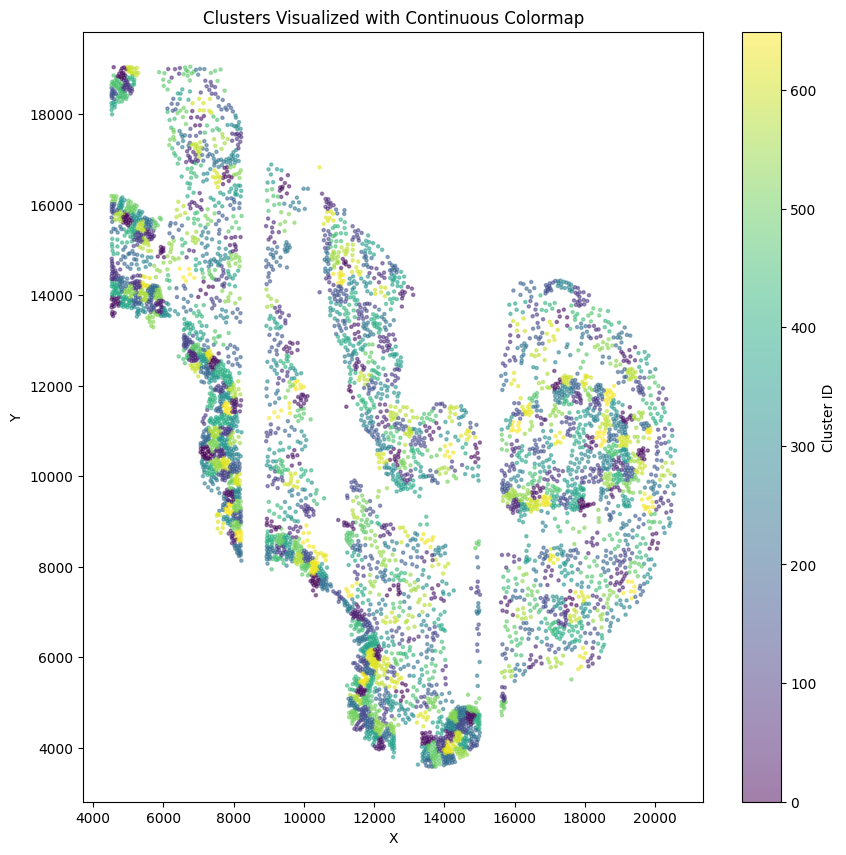

Cluster 0: Radius = 181.61916649489243
Cluster 1: Radius = 233.35753006122218
Cluster 2: Radius = 207.2571964803131
Cluster 3: Radius = 254.4594195011041
Cluster 4: Radius = 283.00707130015024
Cluster 5: Radius = 289.6234696139702
Cluster 6: Radius = 172.79928654400868
Cluster 7: Radius = 290.8678299145701
Cluster 8: Radius = 273.0825702145881
Cluster 9: Radius = 141.16598189454987
Cluster 10: Radius = 197.3397027935367
Cluster 11: Radius = 214.57205366462313
Cluster 12: Radius = 172.2307675674354
Cluster 13: Radius = 189.5211727349647
Cluster 14: Radius = 263.1597795004055
Cluster 15: Radius = 271.6074292285464
Cluster 16: Radius = 211.17434595982078
Cluster 17: Radius = 251.04146318093862
Cluster 18: Radius = 142.52213492352604
Cluster 19: Radius = 245.03773940818792
Cluster 20: Radius = 198.63127304265578
Cluster 21: Radius = 155.81774492448793
Cluster 22: Radius = 156.73519068604793
Cluster 23: Radius = 247.0636074051738
Cluster 24: Radius = 237.1331155180752
Cluster 25: Radius = 1

E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


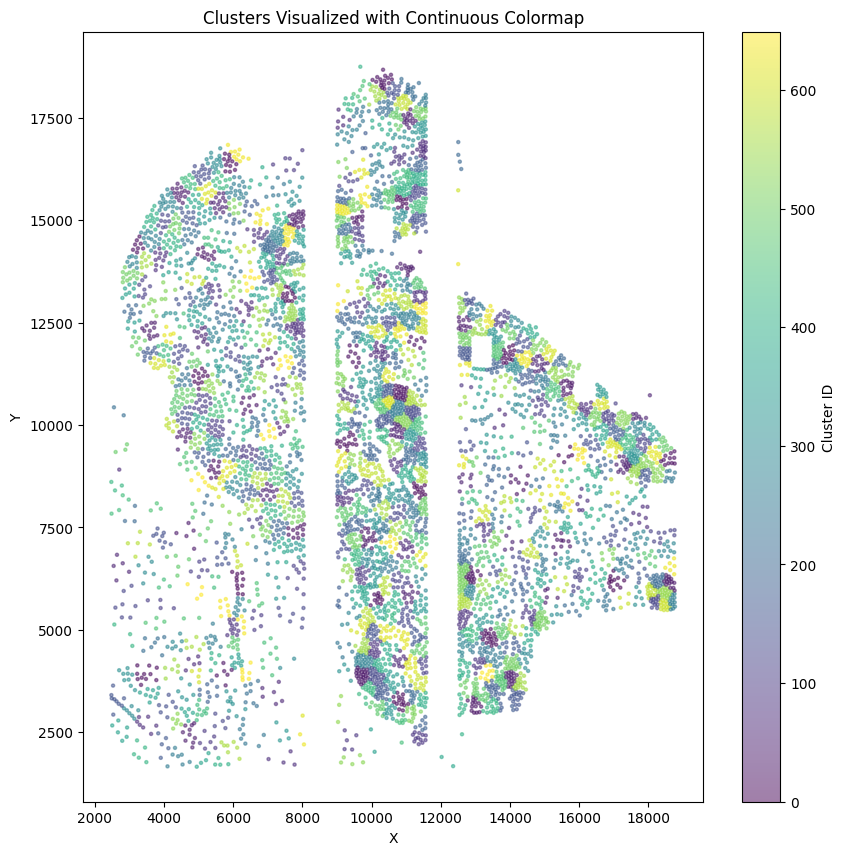

Cluster 0: Radius = 284.46322685853966
Cluster 1: Radius = 220.1104130838938
Cluster 2: Radius = 231.7958696960903
Cluster 3: Radius = 317.67898969850285
Cluster 4: Radius = 273.1617206211501
Cluster 5: Radius = 235.6796857388907
Cluster 6: Radius = 216.6415391640495
Cluster 7: Radius = 285.1392383605945
Cluster 8: Radius = 260.2282496526318
Cluster 9: Radius = 233.09744186639162
Cluster 10: Radius = 254.93135799029835
Cluster 11: Radius = 374.4650784257441
Cluster 12: Radius = 291.46294350229573
Cluster 13: Radius = 246.43277844248234
Cluster 14: Radius = 223.55683359569852
Cluster 15: Radius = 248.91622957563493
Cluster 16: Radius = 285.22688534626224
Cluster 17: Radius = 233.42721266606998
Cluster 18: Radius = 221.93751081419597
Cluster 19: Radius = 222.07709308937277
Cluster 20: Radius = 309.1923690933688
Cluster 21: Radius = 296.8397264997543
Cluster 22: Radius = 266.1806607191359
Cluster 23: Radius = 351.5394559217182
Cluster 24: Radius = 208.27174431816476
Cluster 25: Radius = 2

E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


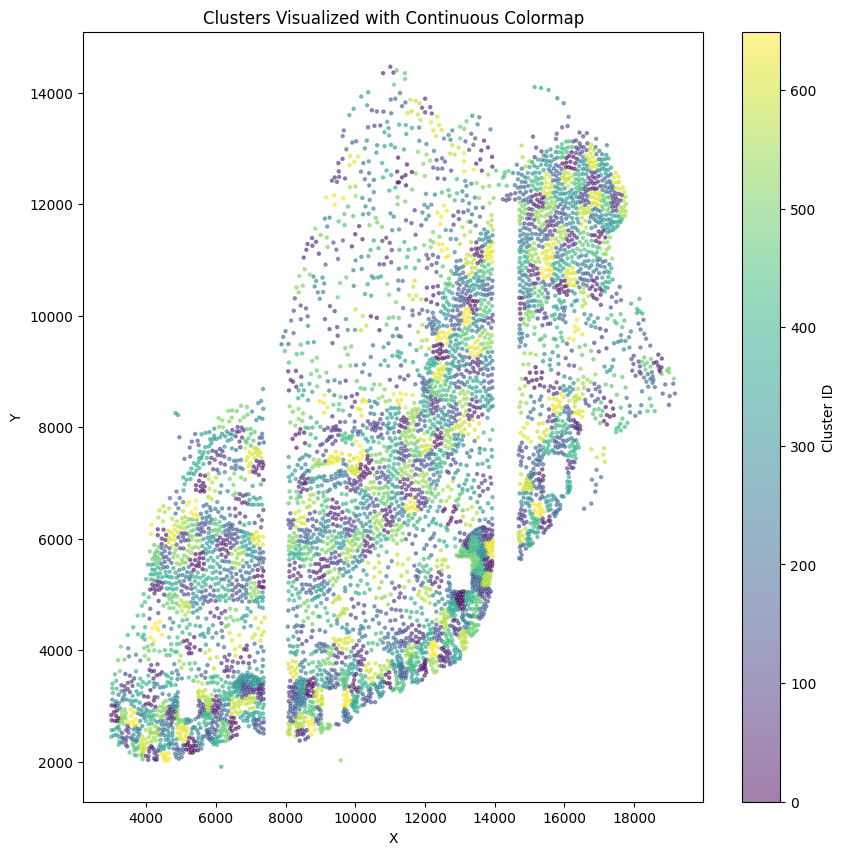

Cluster 0: Radius = 240.97034213160217
Cluster 1: Radius = 183.92040626034785
Cluster 2: Radius = 256.9902747023939
Cluster 3: Radius = 149.20586354792587
Cluster 4: Radius = 224.34183682965298
Cluster 5: Radius = 205.24762042233684
Cluster 6: Radius = 268.9042044330275
Cluster 7: Radius = 216.93007051806964
Cluster 8: Radius = 325.3400074589192
Cluster 9: Radius = 228.30041428606754
Cluster 10: Radius = 184.66096555521142
Cluster 11: Radius = 176.22068437865582
Cluster 12: Radius = 281.00775981453563
Cluster 13: Radius = 207.36785187414992
Cluster 14: Radius = 204.01086918318887
Cluster 15: Radius = 199.7674845316316
Cluster 16: Radius = 132.27554613856753
Cluster 17: Radius = 186.55924840410933
Cluster 18: Radius = 162.15930573890583
Cluster 19: Radius = 190.30254275173934
Cluster 20: Radius = 199.61501095663496
Cluster 21: Radius = 220.1805452028118
Cluster 22: Radius = 170.22786187145508
Cluster 23: Radius = 204.96098485190987
Cluster 24: Radius = 203.7035300833414
Cluster 25: Radi

E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


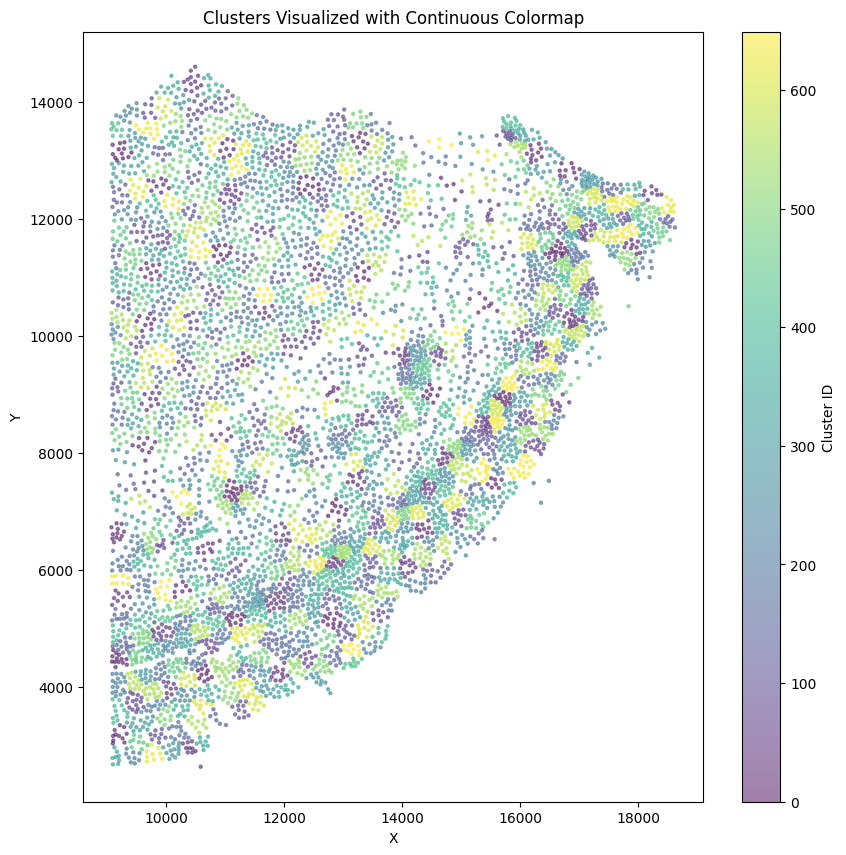

Cluster 0: Radius = 202.08302791451257
Cluster 1: Radius = 187.85475276663047
Cluster 2: Radius = 183.58645756309576
Cluster 3: Radius = 146.5249638898575
Cluster 4: Radius = 171.0441424080307
Cluster 5: Radius = 208.75416424223383
Cluster 6: Radius = 177.39283981431012
Cluster 7: Radius = 196.6044863972987
Cluster 8: Radius = 183.68605410289885
Cluster 9: Radius = 162.12760348602063
Cluster 10: Radius = 183.4881482817716
Cluster 11: Radius = 168.2554361270141
Cluster 12: Radius = 161.95132566073465
Cluster 13: Radius = 131.90636694432496
Cluster 14: Radius = 170.40483856448063
Cluster 15: Radius = 178.93329398729864
Cluster 16: Radius = 170.4700633746525
Cluster 17: Radius = 188.65389217200197
Cluster 18: Radius = 169.41385258044
Cluster 19: Radius = 198.4890019181834
Cluster 20: Radius = 175.19351643178044
Cluster 21: Radius = 161.65127696214577
Cluster 22: Radius = 181.4862970439416
Cluster 23: Radius = 247.3502227149873
Cluster 24: Radius = 172.48706963289328
Cluster 25: Radius = 2

E:\conda\envs\thitogene\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


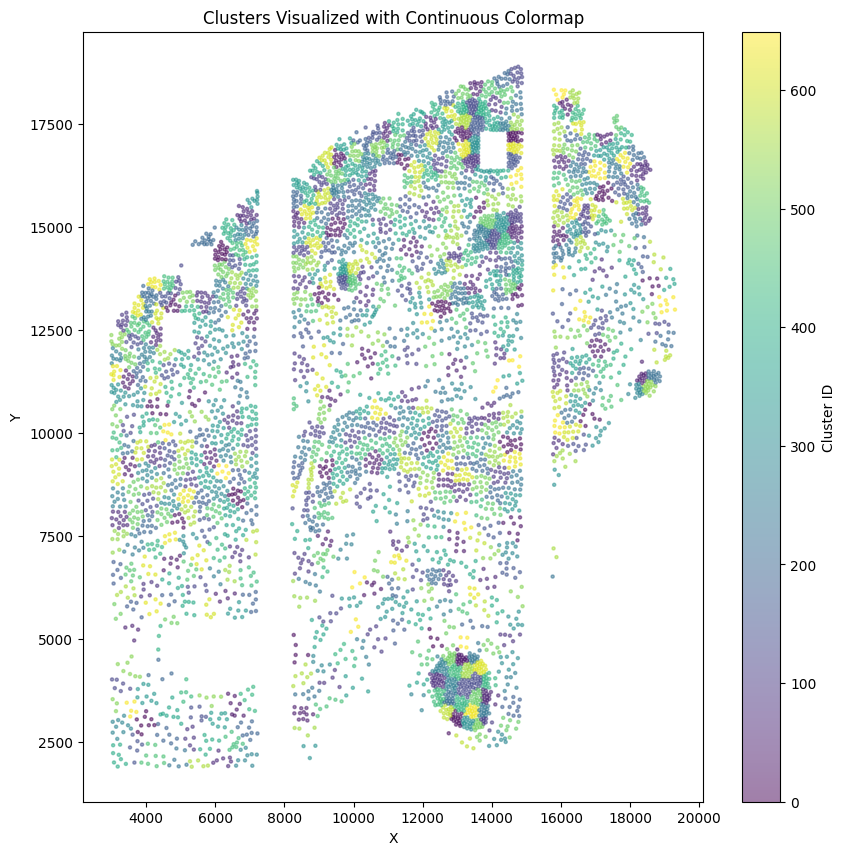

Cluster 0: Radius = 294.102119499302
Cluster 1: Radius = 291.6137740296972
Cluster 2: Radius = 292.9424676785774
Cluster 3: Radius = 289.72417963607563
Cluster 4: Radius = 304.55252682032045
Cluster 5: Radius = 255.8875478508283
Cluster 6: Radius = 193.36997002015434
Cluster 7: Radius = 328.91191363242683
Cluster 8: Radius = 275.01898399428615
Cluster 9: Radius = 319.0651968283403
Cluster 10: Radius = 325.94673335672127
Cluster 11: Radius = 231.83764469662333
Cluster 12: Radius = 424.6015590087471
Cluster 13: Radius = 392.62240374050833
Cluster 14: Radius = 287.0065435291806
Cluster 15: Radius = 218.87051425480703
Cluster 16: Radius = 264.0196744207486
Cluster 17: Radius = 400.53916181554797
Cluster 18: Radius = 286.7246129209256
Cluster 19: Radius = 311.868891713659
Cluster 20: Radius = 246.77959222293634
Cluster 21: Radius = 323.8518710903704
Cluster 22: Radius = 342.19320673153163
Cluster 23: Radius = 267.5703119842148
Cluster 24: Radius = 243.87513898812048
Cluster 25: Radius = 235

In [3]:
for name in NAMES:
    cluster_dir=f'{cluster_path}/{group}/cluster_data_split'
    with open(f'{cluster_dir}/{name}_cells.pkl','rb') as f:
        cell_list_cluster = pickle.load(f)
    centroids = cell_list_cluster.groupby('cluster')[['x', 'y']].mean().sort_index().reset_index().to_numpy()
    cluster_locations = pd.DataFrame([{'cluster': c[0],'x': c[1], 'y': c[2]} for c in centroids])
    n_clusters=int(len(cluster_locations)/10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(cluster_locations[['x', 'y']])
    cluster_locations['super_cluster'] = kmeans.labels_
    
    plt.figure(figsize=(10, 10))
    plt.scatter(
        cluster_locations['x'],
        cluster_locations['y'],
        c=cluster_locations['super_cluster'],
        s=5,
        cmap='viridis',  # Continuous colormap
        alpha=0.5
    )
    plt.colorbar(label='Cluster ID')  # Add colorbar to interpret color mapping
    plt.title('Clusters Visualized with Continuous Colormap')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    data = cluster_locations[['x', 'y']].to_numpy()
    clusters = cluster_locations['super_cluster'].to_numpy()
    centroids = kmeans.cluster_centers_


    cluster_locations['train']=[1]*kmeans.labels_.shape[0]
      # Initialize a dictionary to store the radius of each cluster
    valid_cluster_id=[]
    valid_centroid=[]
    # Calculate radius for each cluster
    for cluster_id in range(len(centroids)):
        x_center, y_center = centroids[cluster_id]

        half_side = int(256 / 2)
        x_min, x_max = x_center - half_side, x_center + half_side
        y_min, y_max = y_center - half_side, y_center + half_side
        
        index_cells_list_in_square =(
        (cluster_locations['x'] >= x_min) & (cluster_locations['x'] <= x_max) &
        (cluster_locations['y'] >= y_min) & (cluster_locations['y'] <= y_max)
        )
        # Get points belonging to the current cluster
        cluster_points = data[clusters == cluster_id]

        # Calculate distances to the cluster centroid
        if len(cluster_points)<1 or len(index_cells_list_in_square)<1:
                cluster_locations.loc[cluster_locations['super_cluster'] == cluster_id, 'train']=-1
        # valid_cluster_id.append(cluster_id)
        # print(len(cluster_points))
    unique_cluster_ids = cluster_locations.loc[cluster_locations['train'] == 1, 'super_cluster'].unique()

    split = np.random.choice(unique_cluster_ids, int(0.1*len(unique_cluster_ids)), replace=False)
    for cluster_id in split:
        cluster_locations.loc[cluster_locations['super_cluster'] == cluster_id, 'train']=0


    with open(f'{cluster_dir}/{name}_clusters.pkl','wb') as f:
        pickle.dump(cluster_locations,f)
    with open(f'{cluster_dir}/{name}_kmeans_cluster.pkl','wb') as f:
        pickle.dump(kmeans,f)
    # Initialize a dictionary to store the radius of each cluster
    cluster_radii = {}

    # Calculate radius for each cluster
    for cluster_id in range(len(centroids)):
        # Get points belonging to the current cluster
        cluster_points = data[clusters == cluster_id]

        # Calculate distances to the cluster centroid
        distances = np.linalg.norm(cluster_points - centroids[cluster_id], axis=1)

        # Radius is the maximum distance
        cluster_radii[cluster_id] = np.max(distances)

    # Print radii for all clusters
    list_r=[]
    for cluster_id, radius in cluster_radii.items():
        print(f"Cluster {cluster_id}: Radius = {radius}")
        list_r.append(radius)
    print(f'mean radius: {np.mean(list_r)}')

In [3]:
for name in NAMES:
    cluster_dir=f'{cluster_path}/{group}/cluster_data_split'
    with open(f'{cluster_dir}/{name}_cells.pkl','rb') as f:
        cell_list_cluster = pickle.load(f)
    with open(f'{cluster_dir}/{name}_clusters.pkl','rb') as f:
        list_cluster = pickle.load(f)
    train_mapping = dict(zip(list_cluster['cluster'], list_cluster['train']))
    cell_list_cluster['train'] = cell_list_cluster['cluster'].map(train_mapping).fillna(cell_list_cluster['train'])

    # Convert the 'train' column to integers
    cell_list_cluster['train'] = cell_list_cluster['train'].astype(int)
    with open(f'{cluster_dir}/{name}_cells.pkl','wb') as f:
        pickle.dump(cell_list_cluster,f)
    